In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
data_L=pd.read_csv("L.csv")
#data_i=pd.read_csv("i.csv")
data_i=pd.read_csv("fig6/I.csv")
I_set=np.array(data_i.iloc[1:,1:])
I_set

array([[45.67040466, 47.98039196, 38.24564491, ..., 27.18028295,
        41.23096265, 46.86537464],
       [48.3594545 , 46.11002634, 38.22494622, ..., 20.86555016,
        41.86975107, 47.42012628],
       [39.01995686, 58.48279488, 42.37102573, ..., 55.53031048,
        64.3951306 , 49.35278278],
       ...,
       [61.26639445, 80.26896103, 37.64617254, ..., 51.45110931,
        68.7343343 , 61.26144821],
       [40.95820278, 30.08399909, 66.95019737, ..., 53.11240083,
        61.96413637, 51.72022852],
       [45.69674928, 49.6719433 , 66.71009843, ..., 44.54289934,
        46.93579199, 63.99145433]])

In [10]:
I_set.shape

(50, 50)

In [11]:
L=np.array(data_L.iloc[:,1:])

In [12]:
def cVector(q,δ,ε,s):
    return δ*q/(ε*(q-abs(s-1)))

In [13]:
def xVector(θ,η):
    return np.add(θ,η)

In [14]:
#k>0,k!=0
#100个样本下，k固定时
def converRate(E_θ_0,θ_k,k,θ_100):
    #θ_k二维
    #θ_100一维
    θ_k_100=θ_k-θ_100
    θ_k_100_2=θ_k_100*θ_k_100
    E_θ_k=np.sum(θ_k_100_2,axis=0)
    
    return ((np.mean(E_θ_k))/(np.mean(E_θ_0)))**(1/(2*k))

In [35]:
h=0.05
s=0.9
δ=1
q=0.2
ε=0.1

In [36]:
result_set=np.zeros([50,100])
for I in I_set:
    θ100_sets=[]
    θk_sets=np.array((np.zeros([50,101])),ndmin=3)
    c=cVector(q,δ,ε,s)
    I=I.reshape(50,1)
    for i in range(100):
        k=0
        θ=I
        for j in range(100):
            θ_next=np.zeros([1,50],dtype=np.int)
            b=c*(q**k)
            η=np.random.laplace(0,b , 50)
            θ_next=θ[:,k]-h*np.dot(L,xVector(θ[:,k],η).reshape(50,1)).T+s*η
            θ_next=np.array(θ_next)
            θ=np.append(θ,θ_next.reshape(50,1),axis=1)
            k=k+1
        θ100_sets.append(np.mean(θ[:,-1]))
        θk_sets=np.append(θk_sets,np.array([θ]),axis=0)
    θ100_sets=np.array(θ100_sets)
    result=[]
    θ_0_100=I-θ100_sets
    θ_0_100_2=θ_0_100*θ_0_100
    E_θ_0=np.sum(θ_0_100_2,axis=0)
    for k in range(100):
        result.append(converRate(E_θ_0,θk_sets[1:,:,k+1].T,k+1,θ100_sets))
    result_set=np.append(result_set,np.array([result]),axis=0)
result_set

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.26823643, 0.94729209, 0.86489182, ..., 0.81937381, 0.8194551 ,
        0.81953492],
       [1.43240275, 0.99974419, 0.8959018 , ..., 0.82026337, 0.82033528,
        0.82040593],
       [1.40429975, 0.99141326, 0.89100174, ..., 0.81956045, 0.81963897,
        0.8197161 ]])

In [40]:
result_set=result_set[50:,:]
result_set

array([[1.29644388, 0.95804876, 0.87191791, ..., 0.81850998, 0.81859537,
        0.81867935],
       [1.39508604, 0.98335688, 0.88351204, ..., 0.81754754, 0.8176446 ,
        0.81773996],
       [1.35319637, 0.96892897, 0.8757033 , ..., 0.81932639, 0.81940643,
        0.81948508],
       ...,
       [1.26823643, 0.94729209, 0.86489182, ..., 0.81937381, 0.8194551 ,
        0.81953492],
       [1.43240275, 0.99974419, 0.8959018 , ..., 0.82026337, 0.82033528,
        0.82040593],
       [1.40429975, 0.99141326, 0.89100174, ..., 0.81956045, 0.81963897,
        0.8197161 ]])

In [41]:
result_set.shape

(50, 100)

In [41]:
# len(θ100_sets)

100

In [42]:
# θ100_sets=np.array(θ100_sets)
# θ100_sets[0:10]

array([52.5831859 , 52.83588321, 48.79139386, 54.52998604, 52.18507707,
       56.0560848 , 47.95809679, 49.37878909, 46.49231595, 53.67627145])

In [43]:
# θk_sets#第一个二维矩阵是0，每个矩阵的第一列是初始值（不加噪声），即θ_0

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[55.35314105, 58.40732601, 57.05008151, ..., 52.58318584,
         52.58318585, 52.58318586],
        [59.64083706, 56.2168546 , 47.97746572, ..., 52.58318585,
         52.58318585, 52.58318586],
        [51.57522836, 49.8844792 , 55.7071636 , ..., 52.5831859 ,
         52.5831859 , 52.5831859 ],
        ...,
        [56.10893285, 54.69423402, 57.17806171, ..., 5

In [44]:
# θk_sets.shape

(101, 50, 101)

In [46]:
# result=[]
# θ_0_100=I-θ100_sets
# θ_0_100_2=θ_0_100*θ_0_100
# E_θ_0=np.sum(θ_0_100_2,axis=0)
# for k in range(100):
#     result.append(converRate(E_θ_0,θk_sets[1:,:,k+1].T,k+1,θ100_sets))

In [47]:
θk_sets[1:,:,1].T

array([[58.40732601, 42.22464487, 48.20913177, ..., 58.28602729,
        61.04573076, 29.81758336],
       [56.2168546 , 85.50098873, 59.88370112, ..., 43.81066517,
        46.40459519, 65.62554691],
       [49.8844792 , 47.57591134, 53.22100565, ..., 42.0979088 ,
        48.71159344, 64.22965025],
       ...,
       [54.69423402, 62.59681527, 56.29280459, ..., 59.28143706,
        62.00416311, 50.15475357],
       [42.6151269 , 46.17329521, 62.99622661, ..., 46.55542258,
        55.32099567, 58.07577775],
       [48.75348009, 50.20284032, 49.20689567, ..., 66.39281421,
        52.70110713, 57.2263653 ]])

In [48]:
result

[1.3650943751554108,
 0.9757175374072882,
 0.8796540527518845,
 0.8422278113048882,
 0.8241199280966606,
 0.8143104158102171,
 0.8086308381518252,
 0.8052354961088631,
 0.8031955552838893,
 0.8020024759244436,
 0.8013591210575944,
 0.8010825986772022,
 0.8010556473679034,
 0.801200558435175,
 0.8014644345663311,
 0.8018104734672957,
 0.8022126154629327,
 0.802652147152091,
 0.8031154840657814,
 0.8035926866027207,
 0.8040764448890416,
 0.8045613709973838,
 0.805043497105797,
 0.8055199143769991,
 0.8059885096923247,
 0.8064477715062689,
 0.8068966452143747,
 0.8073344244381703,
 0.8077606686609615,
 0.808175140394613,
 0.8085777569568954,
 0.8089685532705596,
 0.8093476530403568,
 0.8097152463425804,
 0.8100715721536673,
 0.8104169047046222,
 0.8107515428141081,
 0.8110758015512304,
 0.8113900057277629,
 0.811694484831983,
 0.8119895691018577,
 0.8122755865008121,
 0.812552860409827,
 0.8128217078886969,
 0.8130824383897554,
 0.8133353528312264,
 0.8135807429561212,
 0.8138188909173836

In [55]:
# result=np.array(np.zeros([100,50]))
# # for k in range(100):
# θi_sets=[]
# k=0
# for i in range(50):
#     θi_sets.append(θk_sets[1:,i,k+1])
# for i in range(50):
# #         print(I[i,0])
# #         print(θi_sets[i])
# #         print(k+1)
#     result[k,i]=converRate(I[i,0],np.array(θi_sets[i]),k+1,np.array(θ100_sets))
# result

13178.233355877177
16654.41837259528
21625.896767850933
19495.90919808078
20430.68392171426
4984.9499506400725
30850.23410094319
43135.71106945994
6406.352090467931
17467.285555191942
19321.935031018464
12441.922951499158
14924.667596746276
19711.606057799785
4357.114567177603
27806.555402710677
30468.405796287036
10294.01609440726
52756.90905335592
6826.16115473232
33269.32022651818
12968.445946255602
5038.263231401237
15781.942018436072
17452.322956428678
7961.851214637002
49706.28966650849
23805.96868380029
26425.00802006231
18466.576234048116
27308.041786484268
20051.923228377993
28181.26089758515
20353.155004006236
20932.89368631718
32049.25575545459
14305.404696179628
16442.307333089302
3809.287698381239
51744.196982099835
51118.42689834857
21644.24332066438
4739.195883760128
12741.523546206401
8598.077760934453
21891.967391557653
8441.053795044161
25926.390470413662
16269.118830313473
39760.10591194124


array([[1.8387114 , 1.28932123, 3.73283188, ..., 2.3462126 , 3.30796718,
        1.53833736],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

(100, 50)

In [49]:
I_n=np.eye(50)
II_n=np.ones([50,50])
M=I_n-h*L-II_n
M

array([[-0.5 , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-1.  , -0.45, -1.  , ..., -0.95, -1.  , -1.  ],
       [-1.  , -1.  , -0.45, ..., -1.  , -1.  , -0.95],
       ...,
       [-1.  , -0.95, -1.  , ..., -0.3 , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., -1.  , -0.4 , -1.  ],
       [-1.  , -1.  , -0.95, ..., -1.  , -1.  , -0.3 ]])

In [50]:
eigenvalue,eigenvector=np.linalg.eig(M)
eigenvalue

array([-49.        ,   0.11288295,   0.12419076,   0.17668785,
         0.20020138,   0.22986337,   0.2469578 ,   0.26482917,
         0.82784858,   0.28828309,   0.29715125,   0.81330074,
         0.79827809,   0.79432715,   0.78314011,   0.77204361,
         0.76304121,   0.74560245,   0.73870664,   0.73067526,
         0.71738895,   0.72368794,   0.70070176,   0.34055458,
         0.67478156,   0.67361427,   0.3604829 ,   0.37119512,
         0.65342763,   0.64384985,   0.62133337,   0.61273418,
         0.60073659,   0.5974166 ,   0.57611948,   0.56740776,
         0.3971314 ,   0.54887273,   0.53605626,   0.40905416,
         0.41758826,   0.4249787 ,   0.43811863,   0.517214  ,
         0.51015948,   0.49666614,   0.44927392,   0.45641336,
         0.48122523,   0.4738037 ])

In [51]:
eigenvector

array([[ 0.14142136,  0.03505552,  0.09773192, ...,  0.07993181,
        -0.30079157, -0.00282547],
       [ 0.14142136,  0.02086359,  0.10103829, ..., -0.3742882 ,
        -0.13440935, -0.08695922],
       [ 0.14142136, -0.09416768,  0.0417666 , ...,  0.1071637 ,
         0.08698331, -0.17246559],
       ...,
       [ 0.14142136, -0.02239812, -0.01908732, ...,  0.05952447,
        -0.08672457,  0.02388548],
       [ 0.14142136,  0.00107475,  0.02095905, ...,  0.11205687,
        -0.08759683,  0.03638706],
       [ 0.14142136, -0.00754603,  0.00176009, ...,  0.10928142,
         0.02371878,  0.07662637]])

In [17]:
eigenvalue.shape

(50,)

In [18]:
eigenvector.shape

(50, 50)

In [19]:
eigenvector[:,0]

array([0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136])

In [55]:
u=0.827

In [21]:
θ100_sets

[48.43578764091018,
 52.683340736570315,
 47.795265408687534,
 49.352701773246906,
 47.60199099668305,
 43.24227877553224,
 47.74618308004821,
 47.13574255794687,
 49.2559591644744,
 43.93579455657696,
 48.692265956924764,
 44.53330895567628,
 56.0773561043996,
 51.42303833489446,
 55.661462458362756,
 49.16949158079842,
 51.820933742458486,
 48.143826045470476,
 48.22643795439603,
 50.68251587081814,
 51.691192918302825,
 41.53118854974765,
 48.543019240316916,
 49.470526088066066,
 44.889565289972225,
 52.540644833271465,
 52.03654424116268,
 52.36501311543023,
 54.34917621813075,
 51.70842910515082,
 44.51566047391202,
 49.570278922793484,
 55.30437196430284,
 52.802428130395725,
 56.21811472758993,
 54.202061863167735,
 47.34089456604638,
 53.315526084496156,
 45.85137715672826,
 50.012708486670775,
 48.848798201379,
 44.100593804964866,
 49.912489723982844,
 53.24656674233333,
 52.02144647224492,
 54.34720618271078,
 49.582399040686056,
 48.67553459721985,
 59.67624228994101,
 52.

In [22]:
I

array([[55.35314105],
       [59.64083706],
       [51.57522836],
       [39.23464144],
       [38.72975973],
       [49.17514869],
       [55.53633725],
       [30.60918859],
       [55.01093731],
       [40.5598242 ],
       [45.78243163],
       [59.8801791 ],
       [60.37531123],
       [40.96692991],
       [42.29607849],
       [70.05770367],
       [32.22924456],
       [45.07944701],
       [32.19260777],
       [41.46746468],
       [43.48157196],
       [52.48765209],
       [46.16024932],
       [52.97327589],
       [51.28483954],
       [43.86665069],
       [34.64473003],
       [52.36189788],
       [49.97534491],
       [73.28032462],
       [37.09015062],
       [61.97359226],
       [55.20674522],
       [50.56303352],
       [59.75987573],
       [59.74782961],
       [45.43717891],
       [55.95487854],
       [59.19672809],
       [47.46064986],
       [34.9096658 ],
       [46.76625091],
       [51.58537258],
       [58.26115605],
       [55.5758369 ],
       [64

<IPython.core.display.Javascript object>


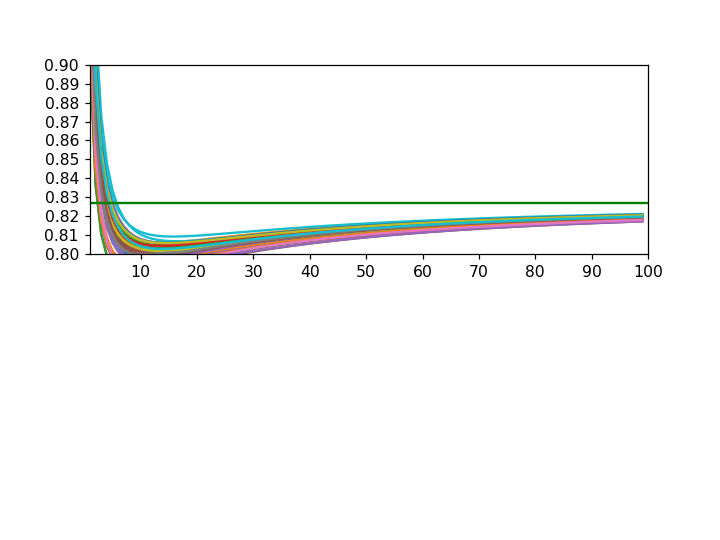

In [56]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_ylim(0.8,0.9)#10^10的对数
ax1.set_xlim(1,100)


x1_major_locator=plt.MultipleLocator(10)
y1_major_locator=plt.MultipleLocator(0.01)


ax1.xaxis.set_major_locator(x1_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)

In [57]:
def figure():
    x1=np.linspace(0,99,100,dtype=int)
    for result in result_set:
        y1=result[x1]
        ax1.plot(x1,y1)
    ax1.axhline(u, color='g')

In [58]:
figure()